In [123]:
import pandas as pd
df=pd.read_csv("Quikr_car.csv")

In [124]:
df.head()


,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


In [125]:
df['Company'].value_counts() #to check how many charcter is prestent

Company
Maruti        384
Hyundai       228
Honda          79
Ford           51
Tata           44
Renault        43
Mahindra       42
Toyota         41
Volkswagen     29
MG             17
Chevrolet      11
Kia            10
Jeep           10
BMW             7
Skoda           7
Nissan          5
Audi            5
Datsun          5
Mercedes        4
Fiat            3
Volvo           2
Jaguar          2
Ssangyong       1
Land            1
Porsche         1
Name: count, dtype: int64

In [126]:
df.shape

(1032, 10)

In [127]:
df.isnull().sum()

Unnamed: 0      0
Name            0
Label           0
Location        2
Price           0
Kms_driven      0
Fuel_type       0
Owner         292
Year            0
Company         0
dtype: int64

the ower is cointain more null values

In [128]:
df.info()
df['Fuel_type'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1032 non-null   int64 
 1   Name        1032 non-null   object
 2   Label       1032 non-null   object
 3   Location    1030 non-null   object
 4   Price       1032 non-null   object
 5   Kms_driven  1032 non-null   object
 6   Fuel_type   1032 non-null   object
 7   Owner       740 non-null    object
 8   Year        1032 non-null   int64 
 9   Company     1032 non-null   object
dtypes: int64(2), object(8)
memory usage: 80.8+ KB


array([' Petrol', ' Petrol ', ' Diesel ', ' Diesel', ' Electric ', ' CNG',
       ' LPG', ' Petrol + CNG ', ' Hybrid ', ' CNG '], dtype=object)

# Data clearning

In [129]:
df=df.drop(columns="Unnamed: 0")
df['Fuel_type']=df['Fuel_type'].str.strip()

In [130]:
df=df.drop(columns="Owner")#this use remove the columns

In [131]:
df=df[df['Price']!="Ask For Price"] #this is used to removed rows

In [132]:
df['Price']=df["Price"].replace("[₹,]",'',regex=True).astype(int)


In [133]:
df=df.dropna()

In [134]:
df['Kms_driven']=df['Kms_driven'].str.replace(',','').str.split('kms').str.get(0)
df['Kms_driven']=df['Kms_driven'].astype(int)

In [135]:
df.head()

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue - 2019,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz - 2017,PLATINUM,Pune,713499,30988,Petrol,2017,Honda


In [136]:
df['Name']=df['Name'].str.split(" ").str.slice(0,3).str.join(" ")
car=df.copy(deep=True) # used for store the clearn data

# Analysis

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_11424\1707830661.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car.Price)


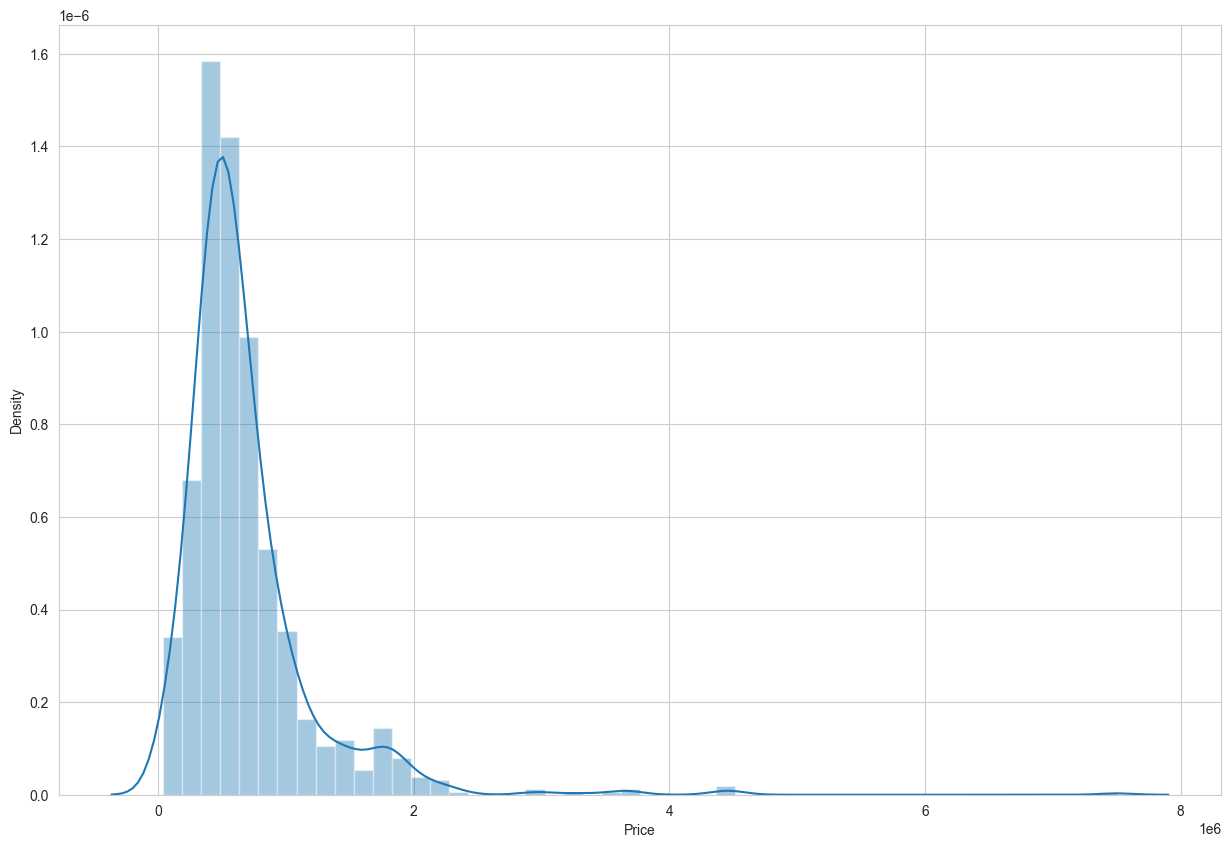

In [138]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(car.Price)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11424\2287289578.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car.Kms_driven)


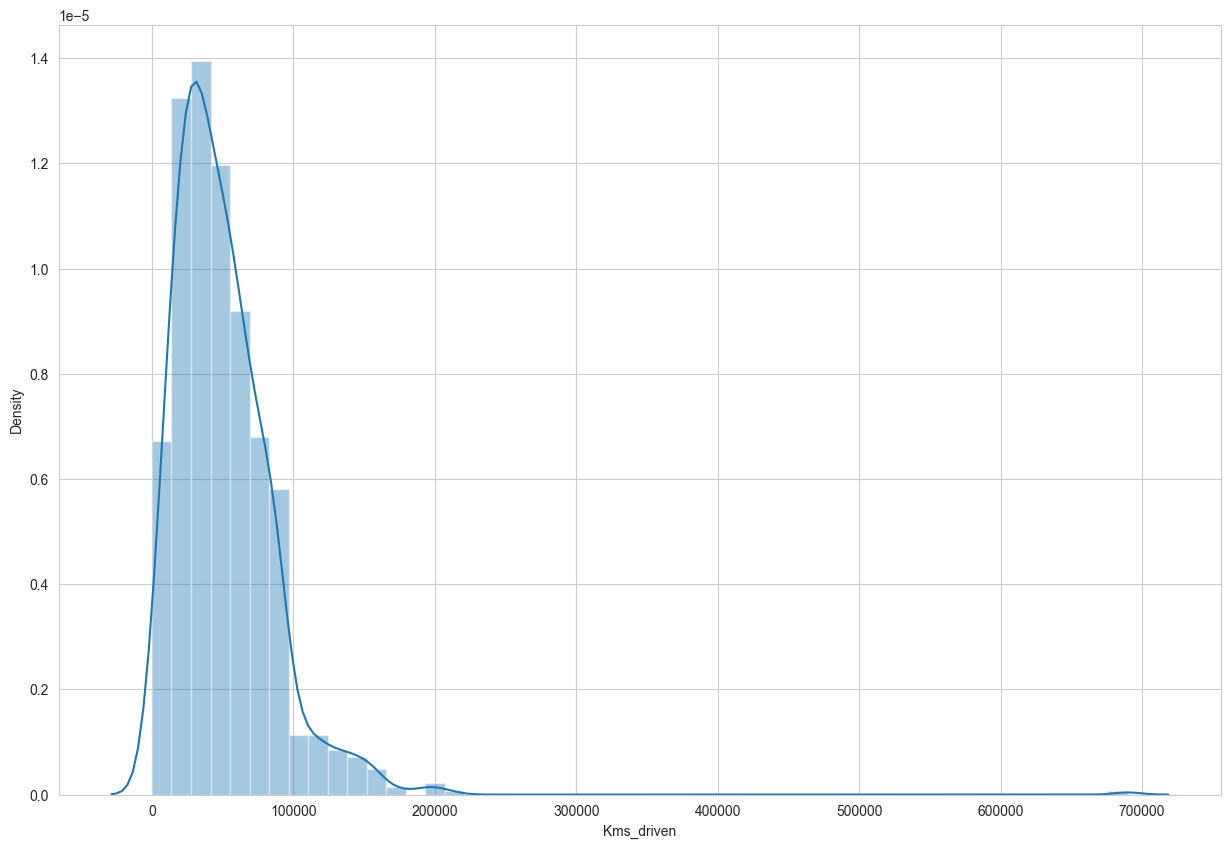

In [139]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(car.Kms_driven)
plt.show()

the above distrubution graph shown that its contains outlayers

In [140]:
#plt.figure(figsize=(15, 10))
##correlations = df.corr()
#sns.heatmap(correlations, cmap="coolwarm", annot=True)
#plt.show()

In [141]:
car.describe()

,Price,Kms_driven,Year
count,1.024000e+03,1024.000000,1024.000000
mean,6.859439e+05,50239.334961,2015.818359
std,5.375162e+05,38137.141129,3.389105
min,3.900000e+04,0.000000,2000.000000
25%,4.110990e+05,26207.000000,2014.000000
50%,5.576990e+05,44000.000000,2016.000000
75%,7.877990e+05,67499.000000,2018.000000
max,7.500000e+06,690000.000000,2022.000000


the 75% of data is lies in 7.8lakh and max 75lakhs there clearn understanding og there is outliyer

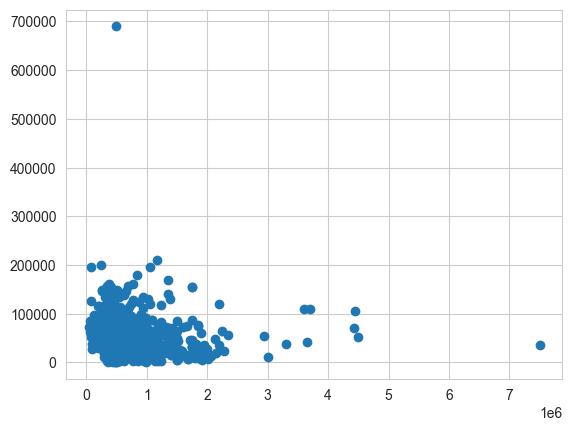

In [142]:
fig, (Graph) = plt.subplots()
Graph.scatter(car['Price'], car['Kms_driven'])
plt.show()

In [143]:
car=car[car['Price']<15e5]
car=car[car['Kms_driven']<1.5e5]

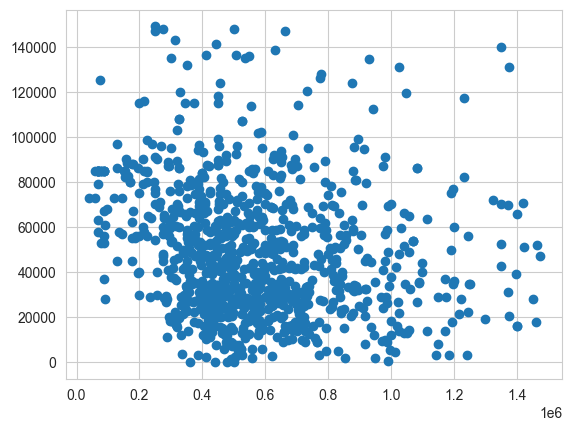

In [144]:
fig, (Graph) = plt.subplots()
Graph.scatter(car['Price'], car['Kms_driven'])
plt.show()

In [145]:
car.describe()

,Price,Kms_driven,Year
count,9.390000e+02,939.000000,939.000000
mean,5.766892e+05,48866.142705,2015.715655
std,2.730883e+05,29075.153199,3.324824
min,3.900000e+04,0.000000,2000.000000
25%,3.999490e+05,26978.000000,2014.000000
50%,5.293990e+05,44266.000000,2016.000000
75%,7.117990e+05,67000.000000,2018.000000
max,1.473299e+06,149000.000000,2022.000000


know the outlier is handle

# future enginering for training the data

In [146]:
car.head()

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
0,Ford Figo Duratec,PLATINUM,Bangalore,380000,35056,Petrol,2015,Ford
1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,44000,Petrol,2016,Maruti
2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,42917,Petrol,2018,Hyundai
3,Hyundai Venue -,PLATINUM,Chennai,1019699,16112,Petrol,2019,Hyundai
4,Honda Jazz -,PLATINUM,Pune,713499,30988,Petrol,2017,Honda


In [147]:
X=car.drop(columns='Price')
y=car['Price']
#x_y=X[['Kms_driven','Year']]



In [121]:
#checkeing with Heteroscedasticity
import statsmodels.api as sm
x_y=X[['Kms_driven','Year']]
X_with_intercept = sm.add_constant(x_y)
model = sm.OLS(y, X_with_intercept).fit()
X['y_pred'] = model.predict(X_with_intercept)
X['residuals'] = model.resid


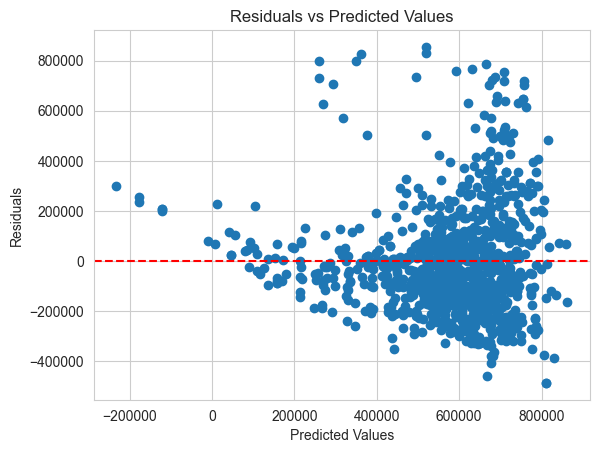

In [122]:
plt.scatter(X['y_pred'], X['residuals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

above the graph show that there no patter btw the error since its not Heteroscedasticity

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1601)
X.columns

Index(['Name', 'Label', 'Location', 'Kms_driven', 'Fuel_type', 'Year',
       'Company'],
      dtype='object')

In [149]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
ohe=OneHotEncoder()
ohe.fit(X[['Name','Company','Fuel_type','Location']])

OneHotEncoder()

In [150]:
from sklearn.compose import make_column_transformer
transformer=make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['Name','Company','Fuel_type','Location']),
    (OrdinalEncoder(categories=[['PLATINUM','GOLD']]),['Label']),
    (StandardScaler(),['Kms_driven']),
    remainder='passthrough')
X_train.columns

Index(['Name', 'Label', 'Location', 'Kms_driven', 'Fuel_type', 'Year',
       'Company'],
      dtype='object')

# model

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
lr=LinearRegression()

In [152]:
model=make_pipeline(transformer,lr)

In [153]:
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW 3 Series', 'BMW 5 Series', 'Chevrolet Aveo -',
       'Chevrolet Beat -', 'Chevrolet Beat LS', 'Chevrolet Beat LT',
       'Chevrolet Cruze LTZ', 'Chevrolet Optra -', 'Chevrolet Sail 1.2',
       'Chevrolet Spark -', 'Datsun GO T', 'Datsun Redi GO',
       'Fiat Line...
       'Kozhikode', 'Kurnool', 'Madurai', 'Malappuram', 'Mumbai',
       'Nagpur', 'Nanded', 'NaviMumbai', 'Pondicherry', 'Pune', 'Surat',
       'Thane', 'Trichy', 'Udaipur', 'Uttarpara'], dtype=object)]),
                                                  ['Name', 'Company',
                                                   'Fuel_type', 'Location']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['PLATINUM',
                                                                              'GOLD']]),
                                                  ['Label']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Kms_driven'])])),
                ('linearregression', LinearRegression())])

In [154]:
y_pred=model.predict(X_test)

# validation of models

In [155]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
print(acc)

0.8524868514996586


In [156]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(piple,X,y,cv=5,scoring='r2')
score

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\compose\_column_transformer.py", line 754, in fit_transform
    result = self._fit_transform(X, y, _fit_transform_one)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\compose\_column_transformer.py", line 681, in _fit_transform
    return Parallel(n_jobs=self.n_jobs)(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\parallel.py", line 65, in __call__
    return super().__call__(iterable_with_config)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\parallel.py", line 127, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 919, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\preprocessing\_encoders.py", line 985, in fit
    self._fit(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\preprocessing\_encoders.py", line 145, in _fit
    raise ValueError(msg)
ValueError: Found unknown categories ['Diesel', 'Petrol + CNG', 'Hybrid', 'CNG', 'LPG', 'Petrol'] in column 2 during fit

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\compose\_column_transformer.py", line 754, in fit_transform
    result = self._fit_transform(X, y, _fit_transform_one)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\compose\_column_transformer.py", line 681, in _fit_transform
    return Parallel(n_jobs=self.n_jobs)(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\parallel.py", line 65, in __call__
    return super().__call__(iterable_with_config)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\parallel.py", line 127, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 919, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\preprocessing\_encoders.py", line 985, in fit
    self._fit(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\preprocessing\_encoders.py", line 145, in _fit
    raise ValueError(msg)
ValueError: Found unknown categories ['Diesel', 'Petrol + CNG', 'Electric', 'Hybrid', 'CNG', 'LPG', 'Petrol'] in column 2 during fit

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\compose\_column_transformer.py", line 754, in fit_transform
    result = self._fit_transform(X, y, _fit_transform_one)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\compose\_column_transformer.py", line 681, in _fit_transform
    return Parallel(n_jobs=self.n_jobs)(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\parallel.py", line 65, in __call__
    return super().__call__(iterable_with_config)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\parallel.py", line 127, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 919, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\preprocessing\_encoders.py", line 985, in fit
    self._fit(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\preprocessing\_encoders.py", line 145, in _fit
    raise ValueError(msg)
ValueError: Found unknown categories ['Diesel', 'Petrol + CNG', 'Electric', 'Hybrid', 'CNG', 'Petrol'] in column 2 during fit

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\compose\_column_transformer.py", line 754, in fit_transform
    result = self._fit_transform(X, y, _fit_transform_one)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\compose\_column_transformer.py", line 681, in _fit_transform
    return Parallel(n_jobs=self.n_jobs)(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\parallel.py", line 65, in __call__
    return super().__call__(iterable_with_config)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\joblib\parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\parallel.py", line 127, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 919, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\preprocessing\_encoders.py", line 985, in fit
    self._fit(
  File "C:\Users\Admin\AppData\Local\anaconda3\envs\machine_learning\lib\site-packages\sklearn\preprocessing\_encoders.py", line 145, in _fit
    raise ValueError(msg)
ValueError: Found unknown categories ['Diesel', 'Petrol + CNG', 'Electric', 'CNG', 'LPG', 'Petrol'] in column 2 during fit


In [87]:
score.mean()
X.columns

Index(['Name', 'Label', 'Location', 'Kms_driven', 'Fuel_type', 'Year',
       'Company'],
      dtype='object')

In [157]:
import pickle
filename="trained_model.sav"
pickle.dump(model,open(filename,'wb'))

In [158]:
load_model=pickle.load(open("trained_model.sav",'rb'))

In [159]:
load_model.predict(X_test)
X.columns

Index(['Name', 'Label', 'Location', 'Kms_driven', 'Fuel_type', 'Year',
       'Company'],
      dtype='object')

In [160]:
import numpy as np
input_data=('Maruti Suzuki Wagon','PLATINUM','Bangalore',44000,'Petrol',2016,'Maruti')
input_array=np.asarray(input_data)


input_data_reshape=data_array.reshape(1,-1)
data_frame=pd.DataFrame(input_data_reshape,columns=['Name', 'Label', 'Location', 'Kms_driven', 'Fuel_type', 'Year',
       'Company'])


In [161]:
load_model.predict(data_frame)

array([535148.81492355])